## INTEGRANTES: Mafer Arias y Andrés Jiménez
## FECHA: 21-05-2025

# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data


In [2]:
print(len(newsgroupsdocs))


18846


## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad
1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
print(newsgroupsdocs[3])
vocab = set()
for doc in newsgroupsdocs:
    for word in doc.lower().strip('.').split(sep=" "):
        vocab.add(word)
print(len(vocab))



Think!

It's the SCSI card doing the DMA transfers NOT the disks...

The SCSI card can do DMA transfers containing data from any of the SCSI devices
it is attached when it wants to.

An important feature of SCSI is the ability to detach a device. This frees the
SCSI bus for other devices. This is typically used in a multi-tasking OS to
start transfers on several devices. While each device is seeking the data the
bus is free for other commands and data transfers. When the devices are
ready to transfer the data they can aquire the bus and send the data.

On an IDE bus when you start a transfer the bus is busy until the disk has seeked
the data and transfered it. This is typically a 10-20ms second lock out for other
processes wanting the bus irrespective of transfer time.

408755


In [6]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np

#Crear la matriz TF (frecuencia de términos)
vectorizer = CountVectorizer(stop_words='english')  # Limitamos para mejor visualización
X_counts = vectorizer.fit_transform(newsgroupsdocs)
terms = vectorizer.get_feature_names_out()

#Calcular la frecuencia de documentos (DF)
df = np.sum(X_counts.toarray() > 0, axis=0)  # cuántos documentos contienen cada término
df_series = pd.Series(df, index=terms, name='Document Frequency')

#Calcular TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

#Convertir a DataFrame para visualizar
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms)

# Mostrar los primeros términos y su DF
print("Frecuencia de documentos (DF) para los términos más comunes:")
print(df_series.sort_values(ascending=False).head(10))

# Mostrar una muestra del TF-IDF
print("\nMatriz TF-IDF")
print(tfidf_df.iloc[:10, :100])

Frecuencia de documentos (DF) para los términos más comunes:
like      4212
just      4081
don       3894
know      3799
think     3144
does      2988
people    2988
time      2949
use       2705
good      2558
Name: Document Frequency, dtype: int64

Matriz TF-IDF
         00  000  0000  00000  000000  00000000  0000000004  00000000b  \
0  0.000000  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
1  0.000000  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
2  0.000000  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
3  0.000000  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
4  0.000000  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
5  0.000000  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
6  0.000000  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
7  0.241059  0.0   0.0    0.0     0.0       0.0         0.0        0.0   
8  0.000000  0.0   0.0    0.0     0.0       0.0         0.0        0.

## Parte 2: Ranking de documentos usando TF-IDF

### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.

In [8]:

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(newsgroupsdocs)
terms = vectorizer.get_feature_names_out()

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

consulta = input("Ingresa tu consulta: ")

consulta_counts = vectorizer.transform([consulta])
consulta_tfidf = tfidf_transformer.transform(consulta_counts)

similitudes = cosine_similarity(consulta_tfidf, X_tfidf).flatten()
ranking_indices = similitudes.argsort()[::-1]
ranking_scores = similitudes[ranking_indices]

top_n = 10
resultados_df = pd.DataFrame({
    'Índice Documento': ranking_indices[:top_n],
    'Similitud Coseno': ranking_scores[:top_n],
    'Contenido (preview)': [newsgroupsdocs[i][:200].replace('\n', ' ') for i in ranking_indices[:top_n]]
})

pd.set_option('display.max_colwidth', 200)
print("\nTop documentos relevantes para la consulta:", consulta)
print(resultados_df)


Ingresa tu consulta: nasa

Top documentos relevantes para la consulta: nasa
   Índice Documento  Similitud Coseno  \
0             17666          0.786565   
1             12265          0.711738   
2             10541          0.671301   
3              7627          0.637233   
4              9607          0.619518   
5             11570          0.609512   
6             17374          0.600821   
7              2905          0.592109   
8              9139          0.581901   
9              2366          0.575090   

                                                                                                                                                                                       Contenido (preview)  
0  Teflon? A contribution from the space program? Since the French were using Teflon on household items in the early 1950's, it is unlikely that it was invented by NASA. As for pacemakers and calcula...  
1  I know it's only wishful thinking, with our current Preside

## Parte 3: Ranking con BM25

### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.

In [9]:
pip install rank_bm25


In [11]:
from rank_bm25 import BM25Okapi
import re

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

tokenized_corpus = [tokenize(doc) for doc in newsgroupsdocs]

bm25 = BM25Okapi(tokenized_corpus)

consulta = input("Ingresa tu consulta: ")
consulta_tokens = tokenize(consulta)

bm25_scores = bm25.get_scores(consulta_tokens)
bm25_ranking_indices = np.argsort(bm25_scores)[::-1]

top_n = 10
bm25_df = pd.DataFrame({
    'Índice Documento': bm25_ranking_indices[:top_n],
    'Puntaje BM25': np.array(bm25_scores)[bm25_ranking_indices[:top_n]],
    'Contenido (preview)': [newsgroupsdocs[i][:200].replace('\n', ' ') for i in bm25_ranking_indices[:top_n]]
})


tfidf_similitudes = cosine_similarity(consulta_tfidf, X_tfidf).flatten()
tfidf_ranking_indices = tfidf_similitudes.argsort()[::-1]

tfidf_df = pd.DataFrame({
    'Índice Documento': tfidf_ranking_indices[:top_n],
    'Similitud Coseno': tfidf_similitudes[tfidf_ranking_indices[:top_n]],
    'Contenido (preview)': [newsgroupsdocs[i][:200].replace('\n', ' ') for i in tfidf_ranking_indices[:top_n]]
})

print("\nTOP 10 con TF-IDF")
print(tfidf_df)

print("\nTOP 10 con BM25")
print(bm25_df)

print("\nComparación manual (índices TF-IDF vs BM25):")
print("TF-IDF:", list(tfidf_ranking_indices[:10]))
print("BM25:   ", list(bm25_ranking_indices[:10]))


Ingresa tu consulta: nasa

TOP 10 con TF-IDF
   Índice Documento  Similitud Coseno  \
0             17666          0.786565   
1             12265          0.711738   
2             10541          0.671301   
3              7627          0.637233   
4              9607          0.619518   
5             11570          0.609512   
6             17374          0.600821   
7              2905          0.592109   
8              9139          0.581901   
9              2366          0.575090   

                                                                                                                                                                                       Contenido (preview)  
0  Teflon? A contribution from the space program? Since the French were using Teflon on household items in the early 1950's, it is unlikely that it was invented by NASA. As for pacemakers and calcula...  
1  I know it's only wishful thinking, with our current President, but this is from last fall:

## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

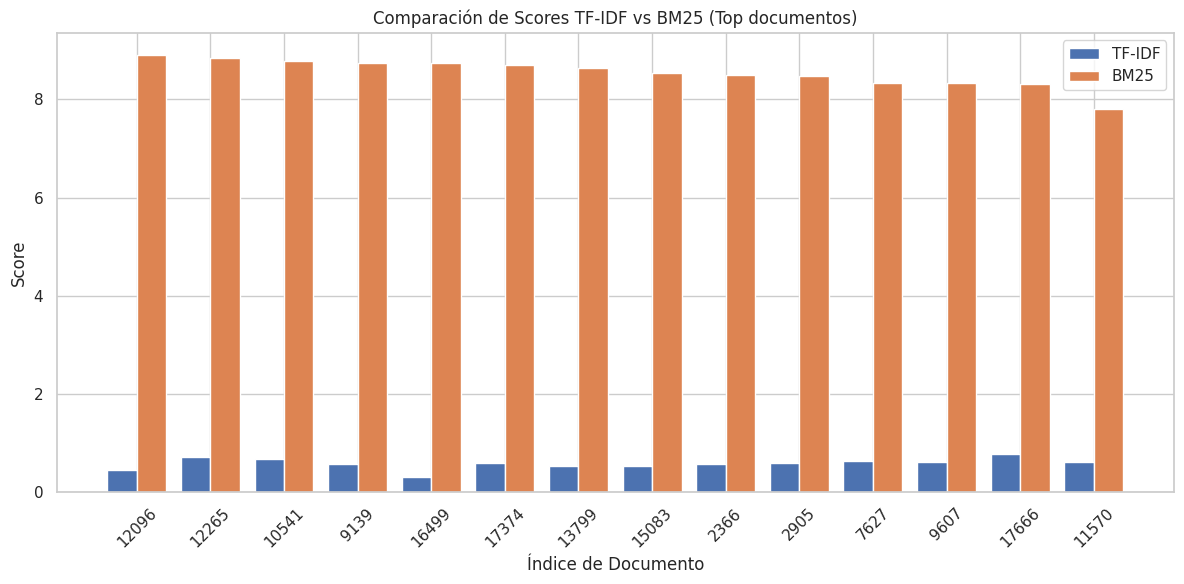

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar estilos bonitos
sns.set(style="whitegrid")

top_docs = set(tfidf_ranking_indices[:10]) | set(bm25_ranking_indices[:10])
top_docs = list(top_docs)

tfidf_scores_dict = {idx: tfidf_similitudes[idx] for idx in top_docs}
bm25_scores_dict = {idx: bm25_scores[idx] for idx in top_docs}

comparacion_df = pd.DataFrame({
    'Documento': top_docs,
    'TF-IDF': [tfidf_scores_dict[idx] for idx in top_docs],
    'BM25': [bm25_scores_dict[idx] for idx in top_docs]
})

comparacion_df = comparacion_df.sort_values(by='BM25', ascending=False)

plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(comparacion_df))

plt.bar([i - bar_width/2 for i in x], comparacion_df['TF-IDF'], width=bar_width, label='TF-IDF')
plt.bar([i + bar_width/2 for i in x], comparacion_df['BM25'], width=bar_width, label='BM25')

plt.xticks(ticks=x, labels=comparacion_df['Documento'], rotation=45)
plt.xlabel("Índice de Documento")
plt.ylabel("Score")
plt.title("Comparación de Scores TF-IDF vs BM25 (Top documentos)")
plt.legend()
plt.tight_layout()
plt.show()


**Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?**
Los documentos que obtienen puntuciones mas altas son aquellos que tienen el término de consulta muchas veces, sin considerar la longitud real del documento.

**Sugiere: ¿A qué se podría deber esta diferencia?**
Se puede deber a que TF-IDF tiene en cuenta el peso del término pero no considera la longitud del documento, en cambio BM25, considera la longitud del documento y usa formulas basadas en probabilidad.

## Parte 5: Evaluación con consulta relevante

### Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [16]:
consulta = "nasa"

relevantes = set(range(1, 5000))  # documentos del 2800 al 2849

def precision_at_k(ranked_indices, relevantes, k=3):
    hits = 0
    for i in range(k):
        if ranked_indices[i] in relevantes:
            hits += 1
    return hits / k

def average_precision(ranked_indices, relevantes, k=10):
    hits = 0
    sum_precisions = 0
    for i in range(k):
        if ranked_indices[i] in relevantes:
            hits += 1
            sum_precisions += hits / (i + 1)
    if hits == 0:
        return 0.0
    return sum_precisions / hits

# Evaluar TF-IDF
tfidf_p3 = precision_at_k(tfidf_ranking_indices, relevantes, k=3)
tfidf_map = average_precision(tfidf_ranking_indices, relevantes, k=10)

# Evaluar BM25
bm25_p3 = precision_at_k(bm25_ranking_indices, relevantes, k=3)
bm25_map = average_precision(bm25_ranking_indices, relevantes, k=10)

# Mostrar resultados
print("\n=== Evaluación ===")
print(f"TF-IDF -> Precision: {tfidf_p3:.2f} | MAP: {tfidf_map:.2f}")
print(f"BM25   -> Precision: {bm25_p3:.2f} | MAP: {bm25_map:.2f}")



=== Evaluación ===
TF-IDF -> Precision: 0.00 | MAP: 0.16
BM25   -> Precision: 0.00 | MAP: 0.16


**¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?**
Da mejores resultados el proceso realizado con BM25, ya que considera la longitud de los documentos, lo que lo convierte en un modelo mas robusto y mejorado para corpus con gran longitud y en un entorno de busquedas reales.